In [1]:
#Import all packages needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #Visualisierungs Package (Vorlesung 5)
#Magic command, damit die Diagramme im Notebook angezeigt werden
%matplotlib inline 

import json  #Package um mit json files arbeiten zu können
import seaborn as sns #Visualisierungs Package (Vorlesung 5)

# Aufgabe

Quelle: *Diese Übung ist ein Teil aus einem Cornerstone Projekt aus dem Data Analyst Nanodegree von Udacity. Für diese Übung wurden einige Vereinfachungen vorgenommen.*

**Beschreibung**:

Habt Ihr jemals von dem Twitter-Account WeRateDogs gehört? Die Leute im Internet sind verrückt nach diesem Twitter-Account. Ich möchte Euch heute zeigen, warum. 

Heute hat WeRateDogs über 9,3 Millionen Follower. Das Schlüsselkonzept besteht darin, ein hübsches Bild der Doggos, Floofer, Pupper oder Puppos (so definieren sie das Entwicklungsstadium der Hunde) mit einer coolen Bildunterschrift und einer Bewertung mit einem Nenner von 10, aber einem Zähler, der alles sein kann, zu haben. In den meisten Fällen geht der Zähler deutlich über 10.


<div>
<img src="src/Picture 1.jpg" width="400"/>
</div>

**Inputdaten:**

Ingesamt haben wir 3 verschiedene Dateien, in denen sich aber verschiedene Fehler in den Daten befinden
- Das Twitter Archive der Tweets
- Eine Datei, in der die Rasse des Hundes vorausgesagt wurde
- Eine Datei, in der die Anzahl der Likes, Retweets etc pro Tweet steht


**Ziel**: 

Die Dateien wie unten vorgeschrieben zu bereinigen und zu einem Dataframe zusammenzufassen.

### Dokumentation der einzelnen Spalten der verschiedenen Quellen

Dokumentation Spalten ***Twitter_archive Dataframe***

Dieses Dataframe zeigt die Meta Daten jedes einzelnen Tweets für den betrachteten Zeitraum an.

- ***tweet_id*** ist die eineindeutige Twitter Post ID
- ***in_reply_to_status_id*** nicht relevant für uns
- ***in_reply_to_user_id*** nicht relevant für uns
- ***timestamp*** Zeitpunkt des posts
- ***source*** nicht relevant für uns
- ***text*** Tweet text
- ***retweeted_status_id*** ID wenn es ein retweet ist
- ***retweeted_status_user_id*** User ID wenn es ein retweet ist
- ***retweeted_status_user_timestamp*** User ID wenn es ein retweet ist
- ***expanded_urls*** URL des Tweets
- ***rating_numerator*** Zähler der Bewertung
- ***rating_denominator*** Nenner der Bewertung
- ***name*** Name des Hundes
- ***doggo*** Hundeentwicklungsstatus
- ***floofer*** Hundeentwicklungsstatus
- ***pupper*** Hundeentwicklungsstatus
- ***puppo*** Hundeentwicklungsstatus

### Dokumentation Spalten ***Image_prediction Dataframe***

Dieses DataFrame stammt aus einem Prediction Maschine Learning Algorithmus, welches an Hand der Bilder, versucht vorauszusagen, welche Rasse der Hund ist

- ***tweet_id*** ist die eineindeutige Twitter Post ID
- ***jpg_url*** URL des Bildes / der Bilder
- ***img_num*** Anzahl der Bilder
- ***p1/p2/p3*** Predicted Hunderasse
- ***p1_conf/p2_conf/p3_conf*** Wert aus der Klassifikation
- ***p1_dog/p2_dog/p3_dog*** Boolean ob der vorausgesagte p1/p2/p3 Wert ein Hund ist ja oder nein



### Dokumentation Spalten ***Tweet_json Dataframe***

Dieses DataFrame zeigt die numerischen Werte der einzelnen Tweets an.

- ***tweet_id*** ist die eineindeutige Twitter Post ID
- ***favorite_count*** Wie viele Favorites der Tweet bekommen hat
- ***retweet_count*** Wie oft der Tweet geretweeted wurde
- ***followers_count*** wie viele Follower es damals gab
- ***retweeted_status*** Ob der Tweet der Original Tweet war oder ein Retweet
- ***url*** URL des Tweets


## Gathering Data

Die nachfolgenden Zellen bis zum Start Der Übung dienen lediglich für Informationszwecke und werden vorgegeben, damit ihr euch schneller auf den wichtigten Teil der Übung, das Data Cleaning fokussieren könnt.

In [2]:
#Twitter Archive (Dateiformat CSV) in einen DataFrame laden
twitter_archive = pd.read_csv("src/twitter-archive-enhanced.csv")

In [3]:
#Bild-Vorhersagen (Image-Predictions - TSV file) in einen DataFrame laden
image_prediction = pd.read_csv('src/image-predictions.tsv', sep='\t' )

In [4]:
'''
Herauslesen der interessanten Informationen aus JSON-Wörterbüchern in einer Txt-Datei
und in einen DataFrame tweets_json einfügen
'''

my_demo_list = []

with open('src/tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = 'Tis is a original tweet'
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
            
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'retweeted_status': retweeted_status,
                            })
        
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'retweeted_status'])

## Assess

#### Twitter_archive Dataframe

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
### FINDINGS ###
# Es gibt sowohl Originalbewertungen und Retweets
# Zeitstempel ist in einem nicht korrekten Datenformat (hier Datetime)
# Fehlende Daten in den folgenden Spalten: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
#                                          retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
# Hundeentwicklungsstufen sind in 4 Spalten

In [7]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None


In [8]:
### FINDINGS ###
# Hundestufen sind nicht korrekt angegeben
# Der Nenner der Bewertung ist zum Teil größer als 10

In [9]:
sum(twitter_archive.name.unique()=='None')

1

In [10]:
# Alternative approach
def intersection(lst1, lst2):
        return [value for value in [x.lower() for x in lst1] if value in lst2]

intersection(list(twitter_archive.name.unique()),['nan', 'none', 'na'])

['none']

In [11]:
### FINDINGS ###
# Name des Hundes ist nicht immer angegebe [ausgedrückt durch None]

In [12]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [13]:
with pd.option_context('max_colwidth', 1000):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'retweeted_status_id', 'rating_denominator']])

/var/folders/2w/s3yyj4_57gz_cgh69ctc_d440000gq/T/ipykernel_10071/279887636.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,retweeted_status_id,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,NaN,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,7.867091e+17,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,NaN,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,NaN,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,NaN,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,NaN,10


In [14]:
### FINDINGS ###
# Wenn der Zähler eine Dezimalzahl ist wie z.B. 13.5 steht in der Spalte rating_numerator nur die ".5" 

### Image_prediction Dataframe

In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True


In [17]:
### FINDINGS ###
# p1, p2, p3 Hunderassen sind manchmal groß, manchmal klein geschrieben
# Die Spalten p1, p2 und p3 enthalten ungültige Daten, wie z. B. ein Vogelhaus, einen Dosenöffner oder einen Brustpanzer usw.

In [18]:
# Doppelte Bilder in den URLs enthalen?
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [19]:
#Anzahl doppelter URLS
len(image_prediction.jpg_url) - image_prediction.jpg_url.nunique()

66

In [20]:
### FINDINGS ###
# Es gibt doppelte Einreichungen von Hundebildern (an Hand der URL) 

### Tweet_json Dataframe

In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   retweeted_status  2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [22]:
### FINDINGS ###
# tweet_id ist ein String und keine Zahl

In [23]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,retweeted_status
1988,672231046314901505,1747,956,8808646,Original tweet
1024,743253157753532416,4188,1210,8808530,Original tweet
613,794205286408003585,9341,3366,8808456,Original tweet
1412,697255105972801536,3007,1150,8808539,Original tweet
1661,681654059175129088,2608,911,8808548,Original tweet
1850,675113801096802304,1877,754,8808641,Original tweet
862,760190180481531904,5690,1797,8808463,Original tweet
2138,669375718304980992,1266,685,8808646,Original tweet
66,879376492567855104,15672,2831,8808437,Original tweet
1896,674262580978937856,1258,431,8808641,Original tweet


In [24]:
tweet_json.retweeted_status.unique()

array(['Original tweet', 'This is a retweet'], dtype=object)

In [25]:
### FINDINGS ###
# Retweets in diesem df

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# Start der Übung

## Zusammenfassung der Beobachtungen aus erster Datenexploration 

##### **`twitter_archive`** 
 - Es gibt sowohl Originalbewertungen und Retweets
 - Es müssen Spalten gelöscht werden, die nicht für die Analyse verwendet werden
 - Hundestufen sind nicht korrekt angegeben
 - Zeitstempel ist in einem nicht korrekten Datenformat (hier Datetime)
 - Fehlende Daten in den folgenden Spalten: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
 - Der Nenner der Bewertung wird größer als 10
 - Wenn der Zähler eine Dezimalzahl ist wie z.B. 13.5 steht in der Spalte rating_numerator nur die ".5" 
 - Manchmal ist der Name des Hundes None
 - Hundeentwicklungsstufen sind in 4 Spalten
 - Alle drei Quellen sollen zum Schluss in einem DataFrame sein
 
  
 ##### **`tweet_json`**
 - tweet_id ist ein String und keine Zahl
 - fehlende Daten für die tweet_ids
 - Retweets in diesem df
 - Alle drei Quellen sollen zum Schluss in einem DataFrame sein
 
 
 ##### **`image_prediction`** 
 - p1, p2, p3 Hunderassen sind manchmal groß, manchmal klein geschrieben
 - Die Spalten p1, p2 und p3 enthalten ungültige Daten, wie z. B. ein Vogelhaus, einen Dosenöffner oder einen Brustpanzer usw.
 - Doppelte Zeilen
 - Alle drei Quellen sollen zum Schluss in einem DataFrame sein

## Aufgaben für euer Data Cleaning

**`twitter_archive`**</br>
1. Lösche alle Retweets und behalte die Originalbewertungen in `twitter_archive`
2. Lösche folgende Spalten in `twitter_archive`: 'source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
3. Konvertiere den Zeitstempel in `twitter_archive` als Datumsformat
4. Korrigiere den Zähler in `twitter_archive`. Wandle es erst als `float` um, und korrigiere die 6 falschen Werte manuell
5. Entferne alle Zeilen in `twitter_archive`, deren Nenner nicht 10 ist
6. Kombinieren alle Spalten der Dog Stages in eine gemeinsame Spalte in `twitter_archive`
</br>
**`tweet_json`**</br>
7. Wandle die tweet_id in ein `int` Format in `tweet_json`</br>
8. Lösche alle Retweets und behalte die Originalbewertungen in `tweet_json`
</br></br>
**`image_predictions`**</br>
9. Überabeite die Spalten der Hunderassen in `image_predictions` so, dass nur Kleinbuchstaben enthalten sind</br>
10. Lösche alle duplizierten Zeilen (ca. 66) mit Bild in `image_predictions`
</br></br>
**Übergreifend**</br>
11. Erstelle einen DataFrame aus den drei bereinigten DataFrames mit Namen `df`</br>
12. Nenne die Spalte text in tweet_text um im Dataframe `df` </br>
13. Outlier Rating_numerator erkennen und droppen, mit Hilfe der IQR

In [26]:
'''
Wir erstellen im ersten Schritt immer eine "Hartcopy", 
auf deren Basis wir dann das Data Cleaning machen damit wir später immer Vergleichen können,
ob die Transformationen wirklich funktioniert haben
'''
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

**1. Lösche alle Retweets und behalte die Originalbewertungen**

In [27]:
#Code
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [28]:
#Test
sum(twitter_archive_clean.retweeted_status_id.value_counts())

0

**2. Lösche folgende Spalten in `twitter_archive`: 
`source`,`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`**

In [29]:
#Code
twitter_archive_clean = twitter_archive_clean.drop(['source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'],
                                                   axis=1)

In [30]:
#Test
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


**3. Konvertiere den Zeitstempel in `twitter_archive` als Datumsformat**

In [31]:
#Code
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [32]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


**4. Korrigiere den Zähler in `twitter_archive`. Wandle es erst als `float` um, und korrigiere die 6 falschen Werte manuell**

In [33]:
#Code
twitter_archive_clean[["rating_numerator","rating_denominator"]] = twitter_archive_clean[["rating_numerator",
                                                                                          "rating_denominator"]].astype(float)
twitter_archive_clean.info()

#Manuelles Updaten der Nenner (numerators)
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

twitter_archive_clean.tail(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,None,None,None,None
2355,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,None,None,None,None,None


In [34]:
#Test
with pd.option_context('max_colwidth', 300):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/var/folders/2w/s3yyj4_57gz_cgh69ctc_d440000gq/T/ipykernel_10071/3408918035.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


**5. Entferne alle Zeilen in `tweet_archive`, deren Nenner nicht 10 ist**

In [35]:
len(twitter_archive_clean[twitter_archive_clean["rating_denominator"] != 10])

22

In [36]:
#Code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

In [38]:
#Test
len(twitter_archive_clean[twitter_archive_clean["rating_denominator"] != 10])

0

**6. Kombinieren alle Spalten der Dog Stages in eine gemeinsame Spalte in `twitter_archive`**

In [39]:
# CODE: 
dog_stage = []

for index, value in twitter_archive_clean.iterrows():
    dog_stages = (value.loc[['doggo', 'pupper', 'floofer','puppo']].values)
    set_dogs = set(dog_stages)
    
    if len(set_dogs) <= 1:
        dog_stage.append(list(set_dogs)[0])

    else:
        if "None" in list(set_dogs) and len(set_dogs) <= 2:
            for dog in list(set_dogs):
                if dog == "None":
                    continue
                else:
                    dog_stage.append(dog)
        else:
            if 'doggo' in list(set_dogs):
                dog_stage.append('doggo')
            
twitter_archive_clean['dogs_stage'] = dog_stage
twitter_archive_clean['dogs_stage'] = twitter_archive_clean['dogs_stage'].apply(str)
twitter_archive_clean.drop(['doggo', 'pupper', 'floofer','puppo'], 1, inplace = True)

#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
#twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
#                                                                'timestamp',
#                                                                'text',
#                                                                'rating_numerator',
#                                                                'rating_denominator',
#                                                                'name'],
#                               var_name='dogs', value_name='dogs_stage')

# twitter_archive_clean[(twitter_archive_clean["dogs_stage"] != twitter_archive_clean["dogs"]) & (twitter_archive_clean["dogs_stage"] != "None")]

# twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

/var/folders/2w/s3yyj4_57gz_cgh69ctc_d440000gq/T/ipykernel_10071/3816786505.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean.drop(['doggo', 'pupper', 'floofer','puppo'], 1, inplace = True)


In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   int64              
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   text                2153 non-null   object             
 3   rating_numerator    2153 non-null   float64            
 4   rating_denominator  2153 non-null   float64            
 5   name                2153 non-null   object             
 6   dogs_stage          2153 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 134.6+ KB


In [41]:
#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean.drop_duplicates(subset=['tweet_id'], keep = 'last', inplace = True)

In [42]:
#TEST
twitter_archive_clean['dogs_stage'].value_counts()

None       1809
pupper      224
doggo        87
puppo        24
floofer       9
Name: dogs_stage, dtype: int64

**7. Wandle die tweet_id in ein `int` Format in `tweet_json`**

In [43]:
#Code
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(int)

In [44]:
#Test
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   retweeted_status  2331 non-null   object
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


**8. Lösche alle Retweets und behalte die Originalbewertungen in `tweet_json`**

In [45]:
#Code
tweet_json_clean = tweet_json_clean[tweet_json_clean["retweeted_status"] == "Original tweet"]

In [46]:
#Test
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

**9. Überarbeite die Spalten der Hunderassen in `image_predictions` so, dass nur Kleinbuchstaben enthalten sind**

In [47]:
#Code
image_prediction_clean.p1 =image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 =image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 =image_prediction_clean.p3.str.lower()

In [48]:
#Test
image_prediction_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,great_pyrenees,0.729745,True,golden_retriever,0.237961,True,labrador_retriever,0.020903,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,great_pyrenees,0.157081,True
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,siberian_husky,0.071712,True,eskimo_dog,0.055770,True
553,677573743309385728,https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg,2,patio,0.535070,False,folding_chair,0.080419,False,parallel_bars,0.034796,False
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,labrador_retriever,0.048200,True,groenendael,0.015394,True
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,norwegian_elkhound,0.372202,True,chesapeake_bay_retriever,0.137187,True,malamute,0.071436,True


**10. Lösche alle duplizierten Zeilen (ca. 66) mit Bild in `image_predictions`**

In [49]:
#Code
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [50]:
#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

**11. Erstelle einen DataFrame aus den drei bereinigten DataFrames mit Namen `df`**

In [51]:
#CODE: Erstellen eines neuen Dataframes df, welches twitter_archive_clean und image_prediction_clean merged
df_merge1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_merge1 = df_merge1[df_merge1['jpg_url'].notnull()]

In [52]:
#TEST
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2152
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   int64              
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   text                1910 non-null   object             
 3   rating_numerator    1910 non-null   float64            
 4   rating_denominator  1910 non-null   float64            
 5   name                1910 non-null   object             
 6   dogs_stage          1910 non-null   object             
 7   jpg_url             1910 non-null   object             
 8   img_num             1910 non-null   float64            
 9   p1                  1910 non-null   object             
 10  p1_conf             1910 non-null   float64            
 11  p1_dog              1910 non-null   object             
 12  p2                  1910 non-null 

In [54]:
#CODE: Erstellen eines neuen Dataframes df, welches df_twitter und tweet_json_clean merged
df = pd.merge(df_merge1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [56]:
#Test
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,retweeted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,bagel,0.085851,False,banana,0.076110,False,35908.0,7624.0,8808438.0,Original tweet
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,...,pekinese,0.090647,True,papillon,0.068957,True,30982.0,5644.0,8808438.0,Original tweet
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,23309.0,3736.0,8808438.0,Original tweet
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,labrador_retriever,0.168086,True,spatula,0.040836,False,39189.0,7790.0,8808437.0,Original tweet
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,37440.0,8392.0,8808438.0,Original tweet


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   int64              
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   text                1910 non-null   object             
 3   rating_numerator    1910 non-null   float64            
 4   rating_denominator  1910 non-null   float64            
 5   name                1910 non-null   object             
 6   dogs_stage          1910 non-null   object             
 7   jpg_url             1910 non-null   object             
 8   img_num             1910 non-null   float64            
 9   p1                  1910 non-null   object             
 10  p1_conf             1910 non-null   float64            
 11  p1_dog              1910 non-null   object             
 12  p2                  1910 non-null 

**12. Nenne die Spalte text in tweet_text um im Dataframe `df`**

In [58]:
#CODE
df.rename(columns={'text': 'tweet_text'}, inplace=True)

In [59]:
#TEST
df.columns

Index(['tweet_id', 'timestamp', 'tweet_text', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'followers_count',
       'retweeted_status'],
      dtype='object')

**13. Outlier Rating_numerator erkennen und droppen, mit Hilfe der IQR**

In [60]:
df.rating_numerator.sort_values(ascending=False)

681     1776.0
1638     420.0
271       14.0
350       14.0
21        14.0
         ...  
1442       1.0
1818       1.0
1655       1.0
233        0.0
711        0.0
Name: rating_numerator, Length: 1910, dtype: float64

In [61]:
# CODE - Detect Outlier
Q1 = df.rating_numerator.quantile(0.25)
Q3 = df.rating_numerator.quantile(0.75)
IQR = float(Q3 - Q1)
lower_bound = float(Q1 - 1.5 * IQR)
upper_bound = float(Q3 + 1.5 * IQR)
print('Untere Grenze: ' , lower_bound, ', Obere Grenze: ', upper_bound)

Untere Grenze:  7.0 , Obere Grenze:  15.0


In [62]:
IQR_out = df.rating_numerator[((df.rating_numerator < lower_bound)
                               |(df.rating_numerator > upper_bound))]

In [63]:
IQR_out.sort_values()

233        0.0
711        0.0
1818       1.0
1655       1.0
1442       1.0
         ...  
1664       6.0
1369       6.0
1906       6.0
1638     420.0
681     1776.0
Name: rating_numerator, Length: 115, dtype: float64

In [64]:
IQR_numerator = df.rating_numerator[~((df.rating_numerator < lower_bound)
                               |(df.rating_numerator > upper_bound))]

In [65]:
IQR_numerator.sort_values()

1908     7.0
1340     7.0
1329     7.0
1745     7.0
1321     7.0
        ... 
129     14.0
592     14.0
35      14.0
144     14.0
350     14.0
Name: rating_numerator, Length: 1795, dtype: float64

In [66]:
# CODE - Delete Outliers
df.loc[(df.rating_numerator < lower_bound), 'rating_numerator'] = lower_bound
df.loc[(df.rating_numerator > upper_bound), 'rating_numerator'] = upper_bound

In [67]:
# TEST
df.rating_numerator.sort_values()

1265     7.0
1744     7.0
1327     7.0
1742     7.0
1329     7.0
        ... 
436     14.0
637     14.0
94      14.0
1638    15.0
681     15.0
Name: rating_numerator, Length: 1910, dtype: float64

**FRAGE: Hat es Sinn gemacht, hier die vermeintlichen Outlier rauszuschmeißen?**

# ÜBUNG ENDE
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Speichern, Analysieren und Visualisieren der Daten

Ein kleiner Ausblick in die Übung 5, bei der es dann um die Visualisierung von Daten geht.

In [68]:
#Speichern der twitter_dogs df in eine CSV Datei
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   int64              
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   tweet_text          1910 non-null   object             
 3   rating_numerator    1910 non-null   float64            
 4   rating_denominator  1910 non-null   float64            
 5   name                1910 non-null   object             
 6   dogs_stage          1910 non-null   object             
 7   jpg_url             1910 non-null   object             
 8   img_num             1910 non-null   float64            
 9   p1                  1910 non-null   object             
 10  p1_conf             1910 non-null   float64            
 11  p1_dog              1910 non-null   object             
 12  p2                  1910 non-null 

In [70]:
dog_stages = df.groupby("dogs_stage")
dog_stages.describe()

tweet_id                                                          \
              count          mean           std           min           25%   
dogs_stage                                                                    
None         1615.0  7.336256e+17  6.831415e+16  6.660209e+17  6.744137e+17   
doggo          68.0  7.969264e+17  4.447709e+16  7.160809e+17  7.561963e+17   
floofer         7.0  7.665514e+17  6.284733e+16  6.853075e+17  7.356341e+17   
pupper        199.0  7.176574e+17  5.551243e+16  6.721600e+17  6.799393e+17   
puppo          21.0  8.098559e+17  5.155348e+16  7.385375e+17  7.562758e+17   

                                                     rating_numerator  \
                     50%           75%           max            count   
dogs_stage                                                              
None        7.054760e+17  7.848442e+17  8.924206e+17           1615.0   
doggo       8.005667e+17  8.299182e+17  8.902403e+17             68.0   
floofer     7.493170e+17  7.883032e+17  8.833607e+17              7.0   
pupper      6.932629e+17  7.360072e+17  8.863661e+17            199.0   
puppo       8.037733e+17  8.596078e+17  8.896654e+17             21.0   

                       ... retweet_count          followers_count  \
                 mean  ...           75%      max           count   
dogs_stage             ...                                          
None        10.604031  ...       2451.00  40231.0          1609.0   
doggo       11.720588  ...       4049.75  76922.0            68.0   
floofer     12.000000  ...       3867.50  15939.0             7.0   
pupper      10.644573  ...       1979.00  32630.0           199.0   
puppo       12.000000  ...       5697.00  43371.0            21.0   

                                                                      \
                    mean        std        min        25%        50%   
dogs_stage                                                             
None        8.808543e+06  76.993591  8808437.0  8808458.0  8808535.0   
doggo       8.808474e+06  35.010180  8808437.0  8808453.0  8808456.0   
floofer     8.808499e+06  44.526611  8808442.0  8808456.5  8808528.0   
pupper      8.808545e+06  59.251653  8808437.0  8808530.0  8808541.0   
puppo       8.808472e+06  37.102753  8808437.0  8808444.0  8808456.0   

                                  
                  75%        max  
dogs_stage                        
None        8808641.0  8808654.0  
doggo       8808527.0  8808532.0  
floofer     8808530.5  8808546.0  
pupper      8808549.5  8808646.0  
puppo       8808526.0  8808530.0  

[5 rows x 80 columns]

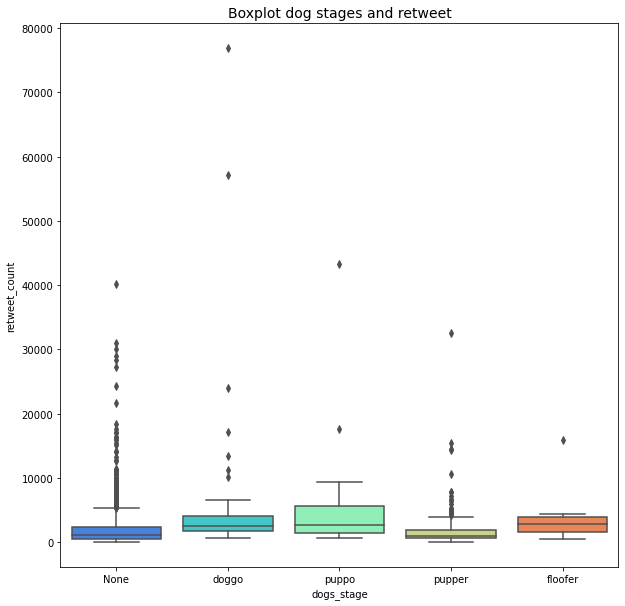

In [71]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dogs_stage',y='retweet_count',data= df,palette='rainbow')
g.axes.set_title('Boxplot dog stages and retweet', fontsize=14);

Doggo stages has huge outliers, there needs to be more investigation to see why this happens at the doggo stages, besides that puppos have on average the most retweets followed by doggo and floofer

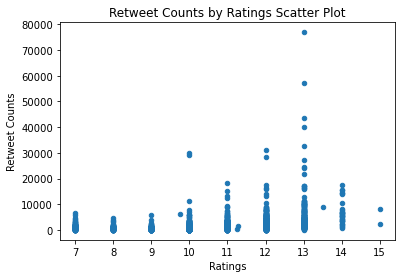

In [72]:
df.plot(y='retweet_count', x='rating_numerator', kind='scatter')
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()

As seen here, the better the rating the more retweets happened the most retweets happend between 12-14

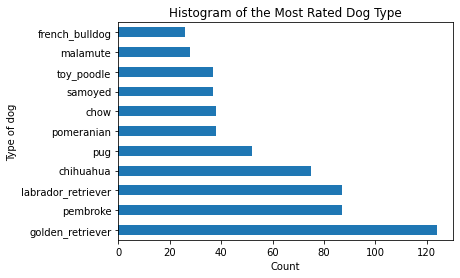

In [73]:
df_dog_type = df.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [74]:
dog_types_count = df_dog_type.p1.value_counts()
dog_types_avg_rating = df_dog_type.groupby('p1').rating_numerator.mean()

df_dog_type.p1.value_counts()

golden_retriever      124
pembroke               87
labrador_retriever     87
chihuahua              75
pug                    52
pomeranian             38
chow                   38
samoyed                37
toy_poodle             37
malamute               28
french_bulldog         26
Name: p1, dtype: int64

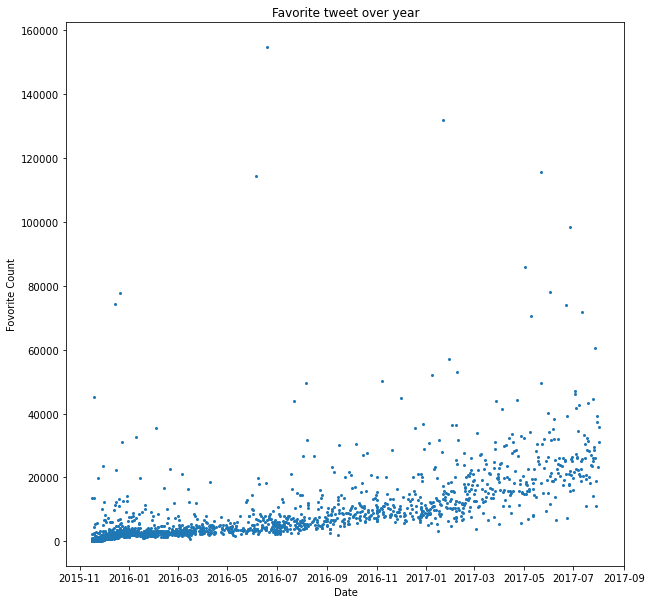

In [75]:
plt.figure(figsize = (10, 10))
plt.plot(df.timestamp,df.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite tweet over year')
plt.xlabel('Date')
plt.ylabel('Fovorite Count')
plt.show()

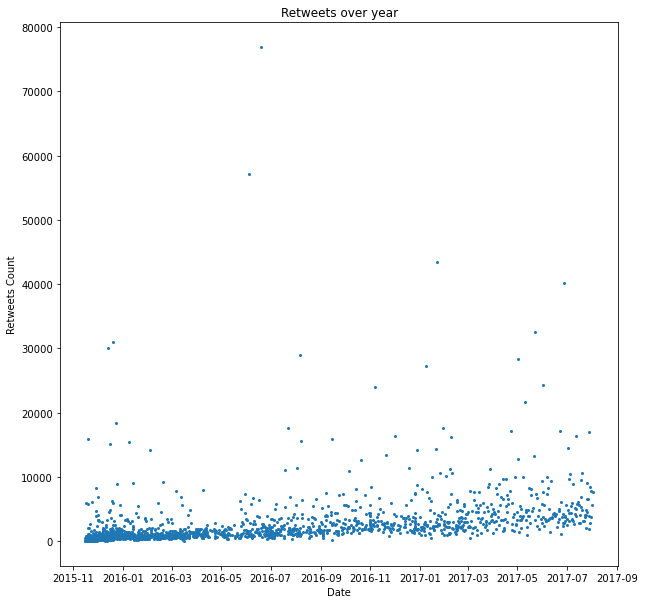

In [76]:
plt.figure(figsize = (10, 10))
plt.plot(df.timestamp,df.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Retweets over year')
plt.xlabel('Date')
plt.ylabel('Retweets Count')
plt.show()